In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -r requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 16057, done.
remote: Total 16057 (delta 0), reused 0 (delta 0), pack-reused 16057
Receiving objects: 100% (16057/16057), 14.66 MiB | 10.12 MiB/s, done.
Resolving deltas: 100% (11028/11028), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.1.0 which is 

In [ ]:
!unzip /content/datasets.zip -d /content/

Archive:  /content/datasets.zip
   creating: /content/datasets/cellcounting/
   creating: /content/datasets/cellcounting/train/
   creating: /content/datasets/cellcounting/train/images/
  inflating: /content/datasets/cellcounting/train/images/220812_GFP-AHPC_A_GFAP_F1_DAPI_ND1_20x.tiff  
  inflating: /content/datasets/cellcounting/train/images/220812_GFP-AHPC_A_GFAP_F10_DAPI_ND1_20x.tiff  
  inflating: /content/datasets/cellcounting/train/images/220812_GFP-AHPC_A_GFAP_F3_DAPI_ND1_20x.tiff  
  inflating: /content/datasets/cellcounting/train/images/220812_GFP-AHPC_A_GFAP_F5_DAPI_ND1_20x.tiff  
  inflating: /content/datasets/cellcounting/train/images/220812_GFP-AHPC_A_GFAP_F7_DAPI_ND1_20x.tiff  
  inflating: /content/datasets/cellcounting/train/images/220812_GFP-AHPC_A_GFAP_F8_DAPI_ND1_20x.tiff  
  inflating: /content/datasets/cellcounting/train/images/220812_GFP-AHPC_A_GFAP_F9_DAPI_ND1_20x.tiff  
  inflating: /content/datasets/cellcounting/train/images/220812_GFP-AHPC_C_GFAP_F3_DAPI_ND1_

In [ ]:
!python train.py --img 640 --epochs 100 --batch-size 16 --data cell.yaml --weights yolov5m.pt

2023-11-15 02:34:34.120248: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-15 02:34:34.120308: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-15 02:34:34.120350: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5m.pt, cfg=, data=cell.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=r

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt  --source /content/220816_GFP-AHPC_A_RIP_F2_DAPI_ND1_20x.tiff

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/220816_GFP-AHPC_A_RIP_F2_DAPI_ND1_20x.tiff, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-228-g4d687c8 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/1 /content/220816_GFP-AHPC_A_RIP_F2_DAPI_ND1_20x.tiff: 480x640 202 cells, 44.7ms
Speed: 0.5ms pre-process, 44.7ms inference, 69.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


In [ ]:
!zip -r result.zip /content/yolov5/runs/train/exp/

  adding: content/yolov5/runs/train/exp/ (stored 0%)
  adding: content/yolov5/runs/train/exp/F1_curve.png (deflated 23%)
  adding: content/yolov5/runs/train/exp/val_batch0_pred.jpg (deflated 6%)
  adding: content/yolov5/runs/train/exp/events.out.tfevents.1700015678.bf32632fa2f6.1204.0 (deflated 47%)
  adding: content/yolov5/runs/train/exp/opt.yaml (deflated 49%)
  adding: content/yolov5/runs/train/exp/results.csv (deflated 85%)
  adding: content/yolov5/runs/train/exp/train_batch2.jpg (deflated 12%)
  adding: content/yolov5/runs/train/exp/weights/ (stored 0%)
  adding: content/yolov5/runs/train/exp/weights/best.pt (deflated 8%)
  adding: content/yolov5/runs/train/exp/weights/last.pt (deflated 8%)
  adding: content/yolov5/runs/train/exp/PR_curve.png (deflated 20%)
  adding: content/yolov5/runs/train/exp/train_batch1.jpg (deflated 7%)
  adding: content/yolov5/runs/train/exp/labels.jpg (deflated 33%)
  adding: content/yolov5/runs/train/exp/hyp.yaml (deflated 45%)
  adding: content/yolov5/r

In [ ]:
!ls

benchmarks.py	 data	     LICENSE	  README.zh-CN.md   segment	    utils
CITATION.cff	 detect.py   models	  requirements.txt  setup.cfg	    val.py
classify	 export.py   __pycache__  result.zip	    train.py	    yolov5m.pt
CONTRIBUTING.md  hubconf.py  README.md	  runs		    tutorial.ipynb


In [ ]:
%matplotlib inline
import torch
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from matplotlib.collections import PatchCollection
import matplotlib.patches as patches
import os

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path="/content/yolov5/runs/train/exp/weights/best.pt")
model.conf = 0.25  # NMS confidence threshold
model.iou = 0.10  # NMS IoU threshold

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-11-8 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 


In [ ]:
results = model('/content/datasets/cellcounting/valid/images/220812_GFP-AHPC_A_GFAP_F4_DAPI_ND1_20x.tiff')

In [ ]:
results.pandas().xyxy[0]

xmin        ymin        xmax        ymax  confidence  class  name
0    732.101196  543.264343  742.764954  554.077271    0.558432      0  cell
1    743.300842  567.770935  753.418945  578.564636    0.537739      0  cell
2    751.637207  552.901062  762.416138  563.285400    0.505172      0  cell
3    768.458496  574.045776  779.487366  584.120422    0.502261      0  cell
4    338.871918   18.363338  349.599152   29.571709    0.487650      0  cell
..          ...         ...         ...         ...         ...    ...   ...
97   278.538666  419.002258  290.604523  429.737732    0.286121      0  cell
98   135.708191  282.246887  147.821899  293.685638    0.284528      0  cell
99    92.006035  484.544952  104.648972  497.101105    0.283475      0  cell
100  296.970764  402.577789  308.959473  413.866394    0.278160      0  cell
101  301.839447  442.205475  313.782288  454.071838    0.269607      0  cell

[102 rows x 7 columns]

In [ ]:
#results.show()

In [ ]:
data_path = '/content/test/220815_GFP-AHPC_B_Nestin_F3_DAPI_ND1_20x.csv'
img_path = '/content/test/220815_GFP-AHPC_B_Nestin_F3_DAPI_ND1_20x.tiff'
results = model(img_path)

In [ ]:
data = pd.read_csv(data_path)

In [ ]:
def box_transformation(location, height, width):
  x, y = location
  h = height / 2
  w = width / 2

  pt1 = (max(0,x-w),max(0,y-h))
  pt2 = (min(x+h,600),min(800,y+h))
  pt3 = (min(x+h,600),max(0,y-h))
  pt4 = (max(0,x-w,min(800,y+h)))


  return [(x-w,y-h),(x+h,y+h),(x+w,y-h),(x-w,y+h)]

In [ ]:
data = data[['X','Y']]

In [ ]:
box = []
for i in data.values.tolist():
  box.append(box_transformation(i, 16, 16))

In [ ]:
pred = results.pandas().xyxy[0]

In [ ]:
xmin_pred = pred['xmin'].values.tolist()
ymin_pred = pred['ymin'].values.tolist()
height = (pred['ymax'] - pred['ymin']).values.tolist()
width = (pred['xmax'] - pred['xmin']).values.tolist()

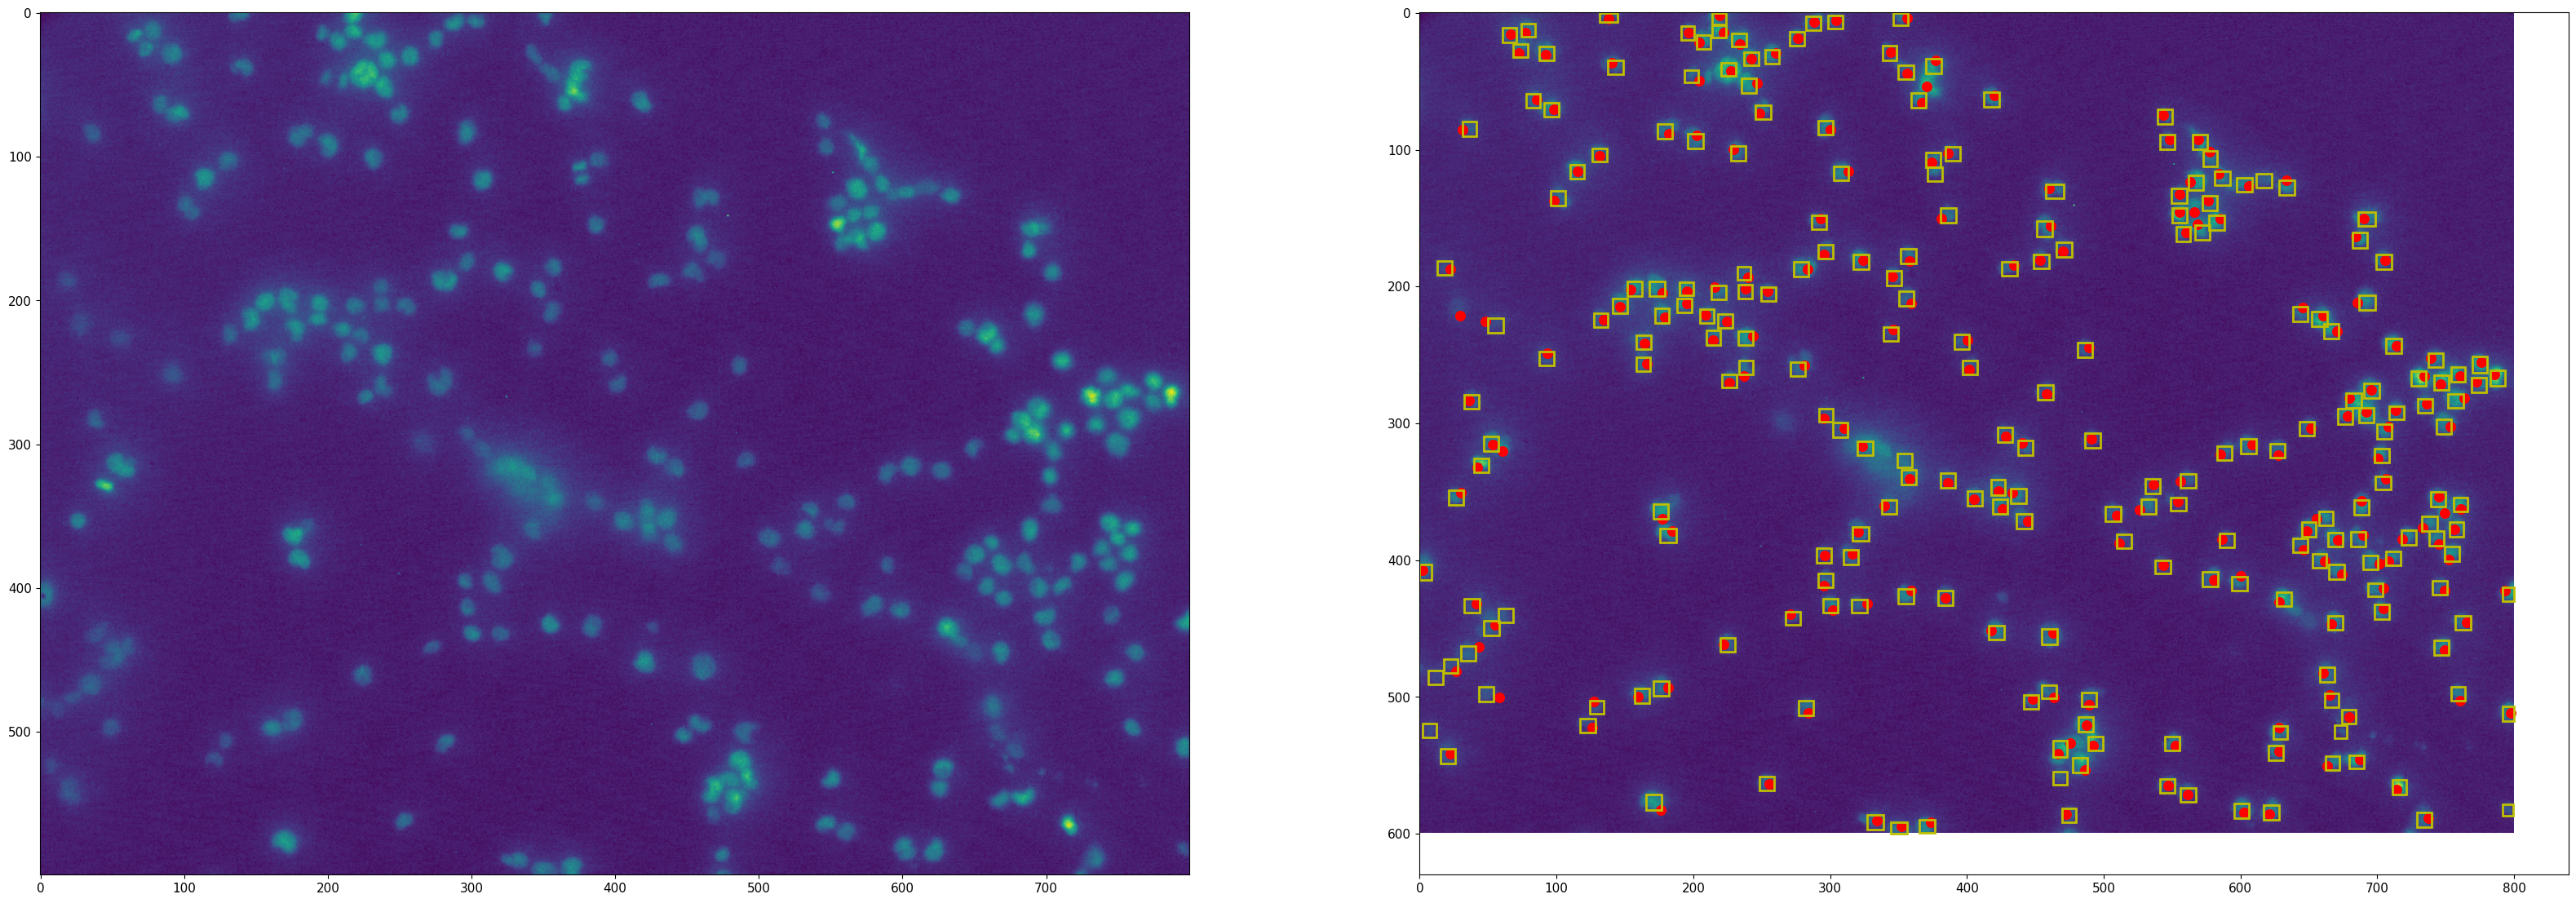

In [ ]:
img = plt.imread(img_path)

fig, ax = plt.subplots(1,2, figsize=(40,30))
ax[0].imshow(img)
ax[1].imshow(img)


# for i in box:
#     x = i[0][0]
#     y = i[0][1]
#     rect = matplotlib.patches.Rectangle((x, y),10,10, linewidth=2, edgecolor='r', facecolor='none')
#     ax[1].add_patch(rect)

ax[1].scatter(data['X'], data['Y'], color='red', s=70)
for i in range(len(xmin_pred)):
  x = xmin_pred[i]
  y = ymin_pred[i]
  h = height[i]
  w = width[i]
  rect = matplotlib.patches.Rectangle((x, y),w,h, linewidth=2, edgecolor='y', facecolor='none')
  ax[1].add_patch(rect)


plt.show()
#plt.savefig('good.png')

In [ ]:
img = plt.imread(img_path)

fig, ax = plt.subplots(1,2, figsize=(80,60))
ax[0].imshow(img,cmap='viridis')
ax[1].imshow(img*10,cmap='viridis')
#ax[1].scatter(data['X'], data['Y'], color='red', s=200)
plt.show()

In [ ]:
!unzip /content/test.zip -d /content/

Archive:  /content/test.zip
  inflating: /content/test/220812_GFP-AHPC_C_GFAP_F10_DAPI_ND1_20x.csv  
  inflating: /content/test/220812_GFP-AHPC_C_GFAP_F10_DAPI_ND1_20x.tiff  
  inflating: /content/test/220815_GFP-AHPC_A_MAP2ab_F2_DAPI_ND1_20x.csv  
  inflating: /content/test/220815_GFP-AHPC_A_MAP2ab_F2_DAPI_ND1_20x.tiff  
  inflating: /content/test/220815_GFP-AHPC_A_Nestin_F8_DAPI_ND1_20x.csv  
  inflating: /content/test/220815_GFP-AHPC_A_Nestin_F8_DAPI_ND1_20x.tiff  
  inflating: /content/test/220815_GFP-AHPC_B_MAP2ab_F1_DAPI_ND1_20x.csv  
  inflating: /content/test/220815_GFP-AHPC_B_MAP2ab_F1_DAPI_ND1_20x.tiff  
  inflating: /content/test/220815_GFP-AHPC_B_Nestin_F3_DAPI_ND1_20x.csv  
  inflating: /content/test/220815_GFP-AHPC_B_Nestin_F3_DAPI_ND1_20x.tiff  
  inflating: /content/test/220815_GFP-AHPC_B_TuJ1_F3_DAPI_ND1_20x.csv  
  inflating: /content/test/220815_GFP-AHPC_B_TuJ1_F3_DAPI_ND1_20x.tiff  
  inflating: /content/test/220815_GFP-AHPC_B_TuJ1_F7_DAPI_ND1_20x.csv  
  inflating:

In [ ]:
# calculate MSE
from sklearn.metrics import mean_absolute_error

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path="/content/best.pt")
model.conf = 0.25  # NMS confidence threshold
model.iou = 0.10  # NMS IoU threshold

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-10-31 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 


In [ ]:
img = []
for i in os.listdir('/content/test'):
  if '.tiff' in i:
    img.append(i)

In [ ]:
#Overall
y_pred = []
y_true = []

for i in range(len(img)):
  pred_result = model('/content/test/' + img[i])
  y_pred.append(len(pred_result.pandas().xyxy[0]))
  true_result = pd.read_csv('/content/test/' + img[i].replace('.tiff','.csv'))
  y_true.append(len(true_result))

mean_absolute_error(y_true, y_pred)

11.25925925925926

In [ ]:
#Low
y_pred = []
y_true = []

for i in range(len(img)):
  pred_result = model('/content/test/' + img[i])
  true_result = pd.read_csv('/content/test/' + img[i].replace('.tiff','.csv'))
  if len(true_result) <= 45:
    y_true.append(len(true_result))
    y_pred.append(len(pred_result.pandas().xyxy[0]))

mean_absolute_error(y_true, y_pred)

1.5714285714285714

In [ ]:
#Mid
y_pred = []
y_true = []

for i in range(len(img)):
  pred_result = model('/content/test/' + img[i])
  true_result = pd.read_csv('/content/test/' + img[i].replace('.tiff','.csv'))
  if len(true_result) <= 310 and len(true_result) > 45:
    y_true.append(len(true_result))
    y_pred.append(len(pred_result.pandas().xyxy[0]))

mean_absolute_error(y_true, y_pred)

7.3076923076923075

In [ ]:
#High
y_pred = []
y_true = []

for i in range(len(img)):
  pred_result = model('/content/test/' + img[i])
  true_result = pd.read_csv('/content/test/' + img[i].replace('.tiff','.csv'))
  if len(true_result) > 310:
    y_true.append(len(true_result))
    y_pred.append(len(pred_result.pandas().xyxy[0]))

mean_absolute_error(y_true, y_pred)


23.571428571428573

7

In [ ]:
def box_transformation(location, height, width):
  x, y = location
  h = height / 2
  w = width / 2

  pt1 = (max(0,x-w),max(0,y-h))
  pt2 = (min(x+h,600),min(800,y+h))
  pt3 = (min(x+h,600),max(0,y-h))
  pt4 = (max(0,x-w,min(800,y+h)))

  return [x-w,y-h,x+w,y+h]

In [ ]:
box_transformation([49,483], 10,10)

[44.0, 478.0, 54.0, 488.0]

In [ ]:
true_xyxy = []
true_result = true_result.sort_values(by=['X', 'Y'])
for i in true_result[['X','Y']].values.tolist():
  true_xyxy.append(box_transformation(i, 10,10))

In [ ]:
pred_xyxy = pred_result.sort_values(by=['xmin', 'ymin'])[['xmin','ymin','xmax','ymax']].values.tolist()

In [ ]:
from torchvision.ops import box_iou

In [ ]:
cnt = 0
for i in range(37):
  if sum(box_iou(torch.tensor(pred_xyxy),torch.tensor(true_xyxy))[i] > 0.1) > 0:
    cnt += 1

In [ ]:
accuracy = []

for i in range(len(img)):
  pred_result = model('/content/test/' + img[i])
  true_result = pd.read_csv('/content/test/' + img[i].replace('.tiff','.csv'))

  true_result = true_result.sort_values(by=['X', 'Y'])[['X','Y']].values.tolist()
  pred_xyxy = pred_result.pandas().xyxy[0].sort_values(by=['xmin', 'ymin'])[['xmin','ymin','xmax','ymax']].values.tolist()


  true_xyxy = []
  for i in true_result:
    true_xyxy.append(box_transformation(i, 10,10))

  cnt = 0

  size = len(true_xyxy) if len(true_xyxy) < len(pred_xyxy) else len(pred_xyxy)

  for i in range(size):
    if sum(box_iou(torch.tensor(pred_xyxy),torch.tensor(true_xyxy))[i] > 0.1) > 0:
      cnt += 1
  accuracy.append(cnt/len(true_xyxy))
  print(i)

36
170
8
468
24
96
237
300
14
46
287
978
223
452
49
390
92
112
610
48
132
391
40
35
468
100
18


In [ ]:
sum(accuracy)/len(accuracy)

0.9132303130154605